In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [3]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = GradientBoostingClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [4]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [6]:
digits = datasets.load_digits()

In [5]:
import plotly.plotly as py
import plotly
import plotly.figure_factory as ff
# plotly.tools.set_credentials_file(
#     username='circlepen', api_key='iisQQGuZlrRgEWgpbWrd')

df = [
    dict(Task='Morning Sleep', Start='2016-01-01',
         Finish='2016-01-01 6:00:00', Resource='Sleep'),
    dict(Task='Breakfast', Start='2016-01-01 7:00:00',
         Finish='2016-01-01 7:30:00', Resource='Food'),
    dict(Task='Work', Start='2016-01-01 9:00:00',
         Finish='2016-01-01 11:25:00', Resource='Brain'),
    dict(Task='Break', Start='2016-01-01 11:30:00',
         Finish='2016-01-01 12:00:00', Resource='Rest'),
    dict(Task='Lunch', Start='2016-01-01 12:00:00',
         Finish='2016-01-01 13:00:00', Resource='Food'),
    dict(Task='Work', Start='2016-01-01 13:00:00',
         Finish='2016-01-01 17:00:00', Resource='Brain'),
    dict(Task='Exercise', Start='2016-01-01 17:30:00',
         Finish='2016-01-01 18:30:00', Resource='Cardio'),
    dict(Task='Post Workout Rest', Start='2016-01-01 18:30:00',
         Finish='2016-01-01 19:00:00', Resource='Rest'),
    dict(Task='Dinner', Start='2016-01-01 19:00:00',
         Finish='2016-01-01 20:00:00', Resource='Food'),
    dict(Task='Evening Sleep', Start='2016-01-01 21:00:00',
         Finish='2016-01-01 23:59:00', Resource='Sleep'),
    dict(Task='Evening Sleep', Start='2016-01-01 14:00:00',
         Finish='2016-01-01 15:59:00', Resource='Sleep')
]

colors = dict(Cardio='rgb(46, 137, 205)',
              Food='rgb(114, 44, 121)',
              Sleep='rgb(198, 47, 105)',
              Brain='rgb(58, 149, 136)',
              Rest='rgb(107, 127, 135)')

fig = ff.create_gantt(df, colors=colors, index_col='Resource', title='Daily Schedule',
                      show_colorbar=True, group_tasks=True, bar_width=0.4, showgrid_x=True, showgrid_y=True)
py.iplot(fig, filename='gantt-hours-minutes', world_readable=True)


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~circlepen/0 or inside your plot.ly account where it is named 'gantt-hours-minutes'


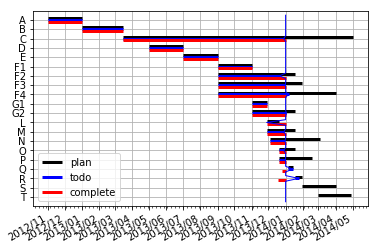

In [9]:
import datetime as dt
import numpy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import locale
from functools import reduce
locale.setlocale(locale.LC_ALL, "")
matplotlib.rcParams['font.family']='IPAPGothic'


today = '2014-01-01'
#task pl_start   pl_end     ac_start   ac_end     progress
data = """
A     2012-11-01 2012-12-31 2012-11-01 2012-12-31 1
B     2013-01-01 2013-03-14 2013-01-01 2013-03-14 1
C     2013-03-15 2014-04-30 2013-03-15 -          .7
D     2013-05-01 2013-06-30 2013-05-01 2013-06-30 1
E     2013-07-01 2013-08-31 2013-07-01 2013-08-31 1
F1    2013-09-01 2013-10-31 2013-09-01 2013-10-31 1
F2    2013-09-01 2014-01-17 2013-09-01 -          .8
F3    2013-09-01 2014-01-30 2013-09-01 -          .8
F4    2013-09-01 2014-03-31 2013-09-01 -          .6
G1    2013-11-01 2013-11-27 2013-11-01 2013-11-27 1
G2    2013-11-01 2014-01-17 2013-11-01 -          .8
L     2013-11-28 2013-12-19 2013-11-28 -          0
M     2013-11-28 2014-01-17 2013-11-28 -          .6
N     2013-12-04 2014-03-02 2013-12-04 -          .3
O     2013-12-20 2014-01-17 2013-12-20 -          .3
P     2013-12-20 2014-02-16 2013-12-20 -          .2
Q     2014-01-05 2014-01-13 2013-12-25 -          1
R     2014-01-18 2014-01-30 2013-12-18 -          .5
S     2014-01-31 2014-03-31 -          -          0
T     2014-03-01 2014-04-28 -          -          0
"""

datefmt = "%Y-%m-%d"
today = dt.datetime.strptime(today, datefmt)

data = [x.split() for x in data.split('\n')]
data = [x for x in data if len(x) == 6]
data = [{
    'label': x[0],
    'planned_start': dt.datetime.strptime(x[1], datefmt),
    'planned_end': dt.datetime.strptime(x[2], datefmt) + dt.timedelta(1),
    'actual_start': today if x[3] == '-' else
                    dt.datetime.strptime(x[3], datefmt),
    'actual_end': today if x[4] == '-' else
                  dt.datetime.strptime(x[4], datefmt) + dt.timedelta(1),
    'progress': float(x[5]),
    } for x in data]
for x in data:
    s = x['planned_start']
    e = x['planned_end']
    r = x['progress']
    x.update(progress_date=s+(e-s)*r)
for x in data:
    s = x['actual_start']
    e = x['actual_end']
    x.update(actual_end=e if e > s else s)

fig, ax = plt.subplots()
ax.hlines(
  [x - 0.2 for x in range(len(data))],
  [x['planned_start'] for x in data],
  [x['planned_end'] for x in data],
  linewidth=3, color='black', label='plan')
ax.hlines(
  [x for x in range(len(data))],
  [x['planned_start'] for x in data],
  [x['progress_date'] for x in data],
  linewidth=3, color='blue', label='todo')
ax.hlines(
  [x + 0.2 for x in range(len(data))],
  [x['actual_start'] for x in data],
  [x['actual_end'] for x in data],
  linewidth=3, color='red', label='complete')

def is_lightening(x, today):
    p = x['progress']
    return p > 0 and p < 1 \
        or p > 0 and x['progress_date'] > today \
        or p < 1 and x['progress_date'] < today
lightening = [
  [(today, idx - 0.5), (today, idx - 0.3),
   (x['progress_date'] if is_lightening(x, today) else today, idx),
   (today, idx + 0.3), (today, idx + 0.5)]
  for idx, x in enumerate(data)]
lightening = reduce(lambda x, y: x + y, lightening)
ax.plot(
  [x[0] for x in lightening],
  [x[1] for x in lightening],
  linewidth=1, color='blue')

ax.xaxis.set_major_formatter(md.DateFormatter('%Y/%m'))
ax.xaxis.set_major_locator(md.MonthLocator())
ax.xaxis.set_minor_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.grid(b=True)

ax.yaxis.set_ticklabels([x['label'] for x in data])
ax.yaxis.set_ticks([idx for idx, x in enumerate(data)])
ax.yaxis.grid(b=True)
ax.set_ylim(len(data), -1)

ax.legend(loc='lower left')

fig.autofmt_xdate()

plt.show()